In [ ]:
import numpy as np

from geometric_sampling.search.astar import AStarFast
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT

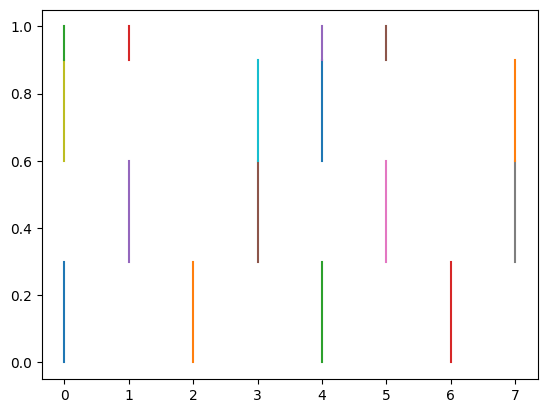

In [2]:
inclusions = [0.7, 0.4, 0.3, 0.6] * 2
d = Design(inclusions)
d.show()

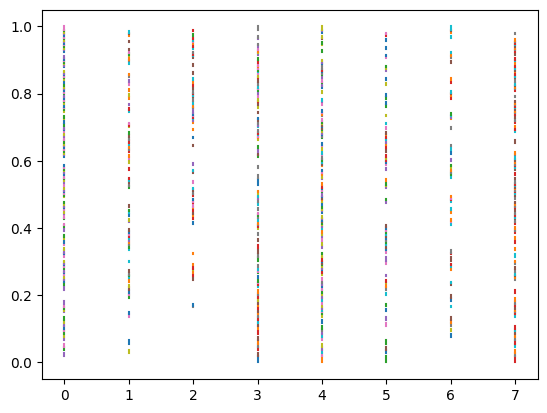

In [3]:
dd = AStarFast.iterate_design(d, 100)
dd.show()

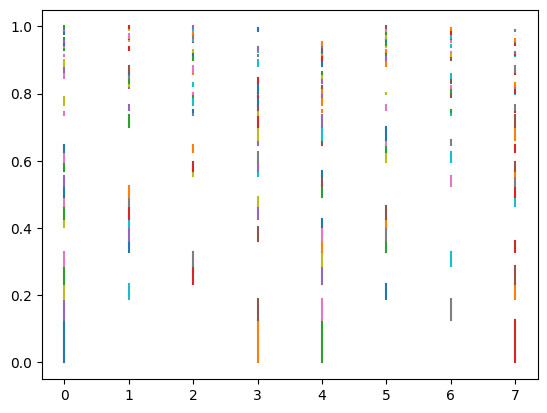

In [4]:
dd.merge_identical()
dd.show()

In [5]:
rng = np.random.default_rng()
x = rng.random(len(inclusions))
a = AStarFast(VarNHT(x, np.array(inclusions)))

print(a.best_criteria_value)

0.7674204572763025


In [6]:
a.run(1000, 10, 100, 1)

1000

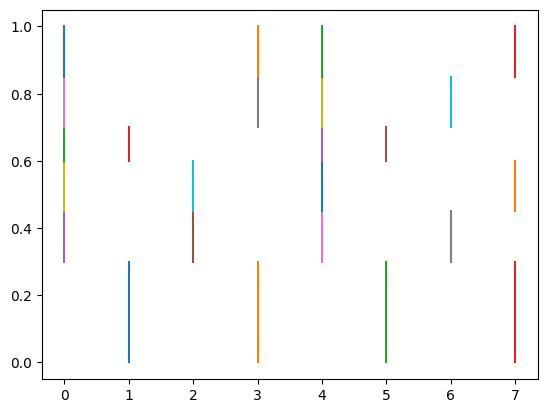

0.5058290631903501


In [7]:
a.best_design.show()
print(a.best_criteria_value)

---

In [2]:
%load_ext autoreload
%autoreload 2

In [19]:
import geometric_sampling as gs
import numpy as np

In [6]:
rng = np.random.default_rng()
N = 50
x = rng.random(size=N)
n = 5
inclusion = rng.random(N)
inclusion *= n / inclusion.sum()

In [7]:
initial_design = gs.Design(inclusion)
nht = gs.criteria.VarNHT(x, inclusion)
astar = gs.search.AStar(initial_design, nht, switch_coefficient=1)

In [ ]:
probs = [sample.probability for sample in design]
sample_ids = [list(sample.ids) for sample in design]
rng.choice(sample_ids, size=5, p=probs)

array([[ 0, 32, 20, 43, 12],
       [ 1, 35, 22, 44, 14],
       [ 2, 37, 25, 45, 15],
       [ 0, 32, 20, 43, 12],
       [ 4, 37, 26, 46, 15]])

149.85538902522603


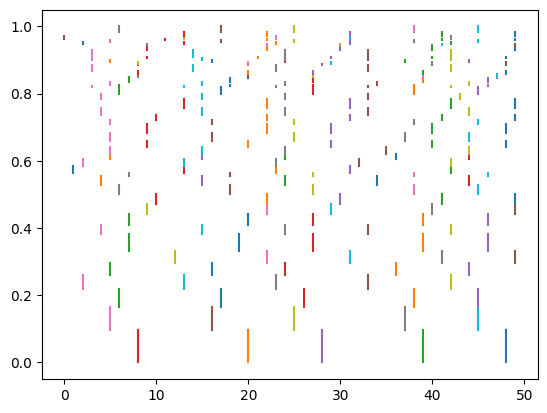

In [44]:
print(astar.initial_criteria_value)
astar.initial_design.show()

In [42]:
astar.run(2000, 10, 10000, 1)

2000

147.89166040276632


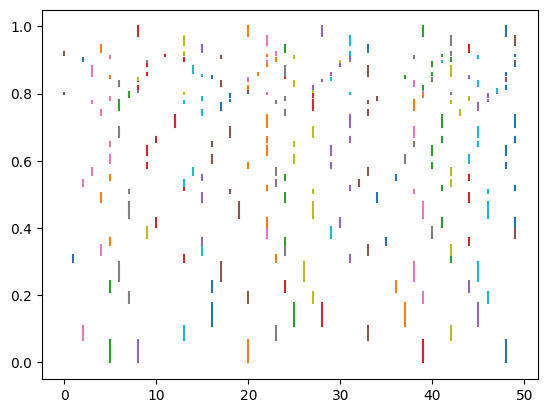

In [45]:
print(astar.best_criteria_value)
astar.best_design.show()

---

# Shatranj

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geometric_sampling as gs
import numpy as np

In [50]:
rng = np.random.default_rng()
N = 100
n = 1
coords = rng.random((N, 2))
probs = rng.random(N)
probs *= n/probs.sum()

In [56]:
n_of_zones = 8

pop = gs.shatranj.Population(
    coords,
    probs,
    n_of_zones=n_of_zones,
    tolerance=9
)

In [57]:
t = 0
for region in pop.regions:
    t += np.sum(region[:, 3])
    print(np.sum(region[:, 3]), round(np.sum(region[:, 3]), 9), np.abs(1/n_of_zones-np.sum(region[:, 3])), np.abs(1/n_of_zones-np.sum(region[:, 3]))<10**-9)
print(t, round(t, 9), n-t, n-t<10**-9)

0.12500000022340058 0.125 2.2340057581615724e-10 True
0.12500000041916975 0.125 4.191697544619899e-10 True
0.1250000003626753 0.125 3.626753064533972e-10 True
0.12500000020515123 0.125 2.0515122933773e-10 True
0.12500000029254735 0.125 2.9254734745798316e-10 True
0.12500000048281196 0.125 4.828119570809974e-10 True
0.12499999977461236 0.125 2.2538763910784354e-10 True
0.12499999883146924 0.124999999 1.168530758266506e-09 False
1.000000000591838 1.000000001 -5.918379120117834e-10 True


In [40]:
def simulate(k, tolerence):
    num_of_subregion_true = 0
    num_of_sum_true = 0
    num_of_all_true = 0
    for i in range(1, k+1):
        subregion_true = 1
        sum_true = 1

        rng = np.random.default_rng()
        N = 100
        n = 10
        coords = rng.random((N, 2))
        probs = rng.random(N)
        probs *= n/probs.sum()

        pop = gm.shatranj.Population(
            coords,
            probs,
            orientation='vertical',
            region_threshold=2,
            subregion_threshold=0.5,
            n_of_zones=4,
            tolerance=9
        )

        t = 0
        for region in pop.regions:
            t += np.sum(region[:, 3])
            if np.abs(2-np.sum(region[:, 3]))>=10**-tolerence:
                subregion_true = 0
        if np.abs(n-t)>=10**-tolerence:
            sum_true = 0

        num_of_subregion_true += subregion_true
        num_of_sum_true += sum_true
        num_of_all_true += subregion_true*sum_true

        print(f"\rIteration: {k} - regions: {round(num_of_subregion_true/k, 2)} - sum: {round(num_of_sum_true/k, 2)} - all: {round(num_of_all_true/k, 2)}", end="", flush=True)
    print()
    print(f"Iteration: {k} - regions: {round(num_of_subregion_true/k, 2)} - sum: {round(num_of_sum_true/k, 2)} - all: {round(num_of_all_true/k, 2)}", end="", flush=True)

In [43]:
simulate(1000, 9)

Iteration: 1000 - regions: 0.81 - sum: 0.91 - all: 0.76
Iteration: 1000 - regions: 0.81 - sum: 0.91 - all: 0.76

In [45]:
coords2 = np.array([
    [0.1, 0.1],
    [0.2, 0.1],
    [0.3, 0.1],
    [0.4, 0.1],
    [0.5, 0.1],
    [0.6, 0.1],
    [0.7, 0.1],
    [0.8, 0.1],
])
probs2 = np.array([0.04, 0.04, 0.06, 0.06, 0.08, 0.37, 0.05, 0.1])
#                  0.04, 0.08, 0.14, 0.20, 0.28, 0.65, 0.70, 0.8
#                   1     2     3     4     5     6     7     8
#                   0     1     2     3     4     5     6     7

In [46]:
pop = gs.shatranj.Population(
        coords2,
        probs2,
        n_of_zones=4,
        tolerance=9
    )

In [47]:
pop.regions

[array([[1.  , 0.1 , 0.1 , 0.04],
        [2.  , 0.2 , 0.1 , 0.04],
        [3.  , 0.3 , 0.1 , 0.02]]),
 array([[3.  , 0.3 , 0.1 , 0.04],
        [4.  , 0.4 , 0.1 , 0.06]]),
 array([[5.  , 0.5 , 0.1 , 0.08],
        [6.  , 0.6 , 0.1 , 0.02]]),
 array([[6. , 0.6, 0.1, 0.1]]),
 array([[6. , 0.6, 0.1, 0.1]]),
 array([[6. , 0.6, 0.1, 0.1]]),
 array([[6.  , 0.6 , 0.1 , 0.05],
        [7.  , 0.7 , 0.1 , 0.05]]),
 array([[8. , 0.8, 0.1, 0.1]])]

In [3]:
coords2 = np.array([
    [0.1, 0.1],
    [0.1, 0.2],
    [0.1, 0.3],
    [0.1, 0.4],
    [0.2, 0.1],
    [0.2, 0.2],
    [0.2, 0.3],
    [0.2, 0.4],
    [0.3, 0.1],
    [0.3, 0.2],
    [0.3, 0.3],
    [0.3, 0.4],
])
probs2 = np.array([0.75]*12)

In [ ]:
pop2 = gm.shatranj.Population(
    coords2,
    probs2,
    orientation='vertical',
    region_threshold=3,
    subregion_threshold=0.5,
    n_of_zones=4,
    tolerance=9
)

In [10]:
pop2.regions

[array([[1.  , 0.1 , 0.1 , 0.75],
        [2.  , 0.1 , 0.2 , 0.75],
        [3.  , 0.1 , 0.3 , 0.75],
        [4.  , 0.1 , 0.4 , 0.75]]),
 array([[5.  , 0.2 , 0.1 , 0.75],
        [6.  , 0.2 , 0.2 , 0.75],
        [7.  , 0.2 , 0.3 , 0.75],
        [8.  , 0.2 , 0.4 , 0.75]]),
 array([[ 9.  ,  0.3 ,  0.1 ,  0.75],
        [10.  ,  0.3 ,  0.2 ,  0.75],
        [11.  ,  0.3 ,  0.3 ,  0.75],
        [12.  ,  0.3 ,  0.4 ,  0.75]])]

In [11]:
pop2._generate_subregions()

[[array([[1. , 0.1, 0.1, 0.5]]),
  array([[1.  , 0.1 , 0.1 , 0.25],
         [1.  , 0.1 , 0.1 , 0.75]]),
  array([[2.  , 0.1 , 0.2 , 1.25]]),
  array([[3. , 0.1, 0.3, 1.5]]),
  array([[3.  , 0.1 , 0.3 , 1.75]]),
  array([[4. , 0.1, 0.4, 2. ]])],
 [array([[5. , 0.2, 0.1, 0.5]]),
  array([[5.  , 0.2 , 0.1 , 0.25],
         [5.  , 0.2 , 0.1 , 0.75]]),
  array([[6.  , 0.2 , 0.2 , 1.25]]),
  array([[7. , 0.2, 0.3, 1.5]]),
  array([[7.  , 0.2 , 0.3 , 1.75]]),
  array([[8. , 0.2, 0.4, 2. ]])],
 [array([[9. , 0.3, 0.1, 0.5]]),
  array([[9.  , 0.3 , 0.1 , 0.25],
         [9.  , 0.3 , 0.1 , 0.75]]),
  array([[10.  ,  0.3 ,  0.2 ,  1.25]]),
  array([[11. ,  0.3,  0.3,  1.5]]),
  array([[11.  ,  0.3 ,  0.3 ,  1.75]]),
  array([[12. ,  0.3,  0.4,  2. ]])]]

In [12]:
t = 0
for region in pop2.regions:
    t += np.sum(region[:, 3])
    print(np.sum(region[:, 3]), round(np.sum(region[:, 3]), 9), np.abs(2-np.sum(region[:, 3])), np.abs(2-np.sum(region[:, 3]))<10**-9)
print(t, round(t, 9))

3.0 3.0 1.0 False
3.0 3.0 1.0 False
3.0 3.0 1.0 False
9.0 9.0


In [41]:
t = 0
for region in pop2.subregions:
    for subregion in region:
        t += np.sum(subregion[:, 3])
        print(np.sum(subregion[:, 3]), round(np.sum(subregion[:, 3]), 9))
print(t, round(t, 9))

0.5 0.5
1.1 1.1
1.4 1.4
1.7 1.7
2.0 2.0
2.1 2.1
0.5 0.5
1.1 1.1
1.4 1.4
1.7 1.7
2.0 2.0
2.1 2.1
0.5 0.5
1.1 1.1
1.4 1.4
1.7 1.7
2.0 2.0
2.1 2.1
0.5 0.5
0.7 0.7
2.6 2.6
4.5 4.5
6.4 6.4
8.3 8.3
49.400000000000006 49.4


---
# KMeans

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy.typing import NDArray

import geometric_sampling as gs
import matplotlib.pyplot as plt

In [3]:
def generate_2d_grid_coordinates(N):
    grid_1d = np.linspace(0, 1, N)
    x, y = np.meshgrid(grid_1d, grid_1d)
    grid_coordinates = np.vstack([x.ravel(), y.ravel()]).T
    return grid_coordinates

In [4]:
def generate_random_coordinates(N, seed=None):
    rng = np.random.default_rng(seed)
    coordinates = rng.random((N, 2))
    return coordinates

In [5]:
def generate_equal_probabilities(N: int, n: int) -> NDArray:
    probabilities = np.full(N, n/N)
    return probabilities

In [6]:
def generate_unequal_probabilities(N: int, n: int, seed: int = None) -> NDArray:
    rng = np.random.default_rng(seed)
    probabilities = rng.random(N)
    probabilities *= n/probabilities.sum()
    return probabilities

In [53]:
N = 200
n = 10

coords = generate_random_coordinates(N)
probs = generate_unequal_probabilities(N, n)

# coords = generate_2d_grid_coordinates(N)
# probs = generate_equal_probabilities(N**2, n)

In [54]:
sbk = gs.balanced_kmeans.SoftBalancedKMeans(k=n)
sbk.fit(coords)

In [55]:
sbk._balance(coords, probs)

[0.6506233  0.97832295 0.99377303 0.85014826 1.4658745  0.88831118
 1.25933782 0.96082641 0.9645469  0.98823566]
Transfering data point 25 with prob 0.00248 from cluster 4 to cluster 0
[0.65310365 0.97832295 0.99377303 0.85014826 1.46339415 0.88831118
 1.25933782 0.96082641 0.9645469  0.98823566]
Transfering data point 128 with prob 0.07262 from cluster 4 to cluster 0
[0.72572395 0.97832295 0.99377303 0.85014826 1.39077385 0.88831118
 1.25933782 0.96082641 0.9645469  0.98823566]
Transfering data point 143 with prob 0.05356 from cluster 4 to cluster 8
[0.72572395 0.97832295 0.99377303 0.85014826 1.35532074 0.88831118
 1.25933782 0.96082641 1.         0.98823566]
Transfering data point 143 with prob 0.01811 from cluster 4 to cluster 8
[0.72572395 0.97832295 0.99377303 0.85014826 1.33721099 0.88831118
 1.25933782 0.96082641 1.01810976 0.98823566]
Transfering data point 159 with prob 0.01074 from cluster 4 to cluster 0
[0.7364632  0.97832295 0.99377303 0.85014826 1.32647174 0.88831118
 1.2

In [56]:
sbk.clusters_sum

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
labels = np.zeros(N)
for i, point in enumerate(sbk.fractional_labels):
    label = np.nonzero(point)[0]
    if len(label) == 1:
        labels[i] = label[0]
    else:
        labels[i] = n

labels

array([ 9.,  5.,  2.,  8.,  7.,  4.,  9.,  6.,  5.,  5.,  8.,  3.,  7.,
        7.,  2.,  7.,  1.,  1.,  9.,  1.,  3.,  6.,  5.,  1.,  5.,  8.,
       10.,  3.,  7.,  6.,  9.,  8.,  1.,  5.,  4.,  7., 10.,  6.,  7.,
        8.,  5.,  7.,  1.,  0.,  8.,  9., 10.,  5.,  4.,  6., 10., 10.,
        6., 10.,  7.,  8.,  8.,  9.,  0.,  5.,  1.,  6.,  3.,  1.,  5.,
        3.,  2.,  2.,  7.,  5.,  2.,  2.,  5.,  1.,  6.,  1.,  9.,  4.,
        8.,  9.,  3.,  0.,  9.,  2.,  1.,  5.,  8.,  0.,  3.,  5.,  6.,
        3.,  6.,  4.,  9.,  1.,  3.,  0.,  5., 10.,  0.,  1.,  9.,  4.,
        8.,  8.,  4.,  1.,  5.,  3.,  4., 10.,  1.,  8.,  8.,  7.,  0.,
        8.,  7., 10.,  5.,  2.,  4.,  2.,  8.,  8.,  4.,  9.,  0.,  0.,
        6.,  5.,  7.,  2.,  6.,  3.,  4.,  5.,  8.,  5.,  7.,  3.,  6.,
        8.,  6.,  1.,  9.,  0.,  3.,  9., 10.,  0.,  2.,  5.,  7.,  7.,
        8.,  0.,  9., 10.,  2.,  1.,  7.,  9.,  3., 10., 10.,  1.,  1.,
        8., 10.,  8.,  0.,  5.,  4.,  0.,  1.,  2.,  9.,  6.,  4

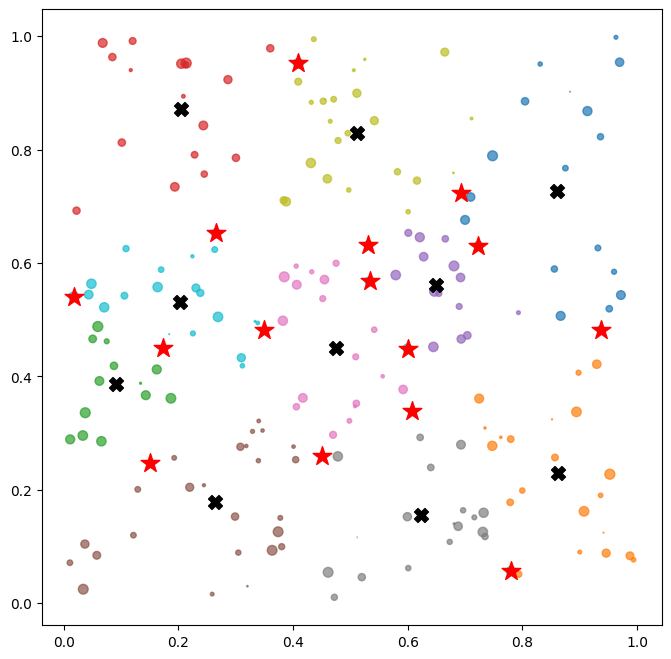

In [58]:
plt.figure(figsize=(8, 8))
plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab10', alpha=0.7, s=probs*500)
plt.scatter(sbk.centroids[:, 0], sbk.centroids[:, 1], c="black", marker="X", s=100)
plt.scatter(coords[:, 0][labels == n], coords[:, 1][labels == n], c="red", marker="*", s=200)

# for i, (x, y) in enumerate(coords):
#     plt.text(x, y, str(i), fontsize=9, ha='center', va='bottom')

# for i, (cx, cy) in enumerate(sbk.centroids):
#     plt.text(cx, cy, str(i), fontsize=12, ha='center', va='bottom', color='blue', weight='bold')

In [105]:
np.array([]).size > 0

False